Cluster into specific farm types and see if you can find the optimal way to manage them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
farmer_df = pd.read_csv('./data/farmer_advisor_dataset.csv')
farmer_df = farmer_df.drop(columns='Farm_ID')

In [3]:
farmer_df.head()

,Soil_pH,Soil_Moisture,Temperature_C,Rainfall_mm,Crop_Type,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score
0,7.073643,49.145359,26.668157,227.890912,Wheat,131.692844,2.958215,1.576920,51.913649
1,6.236931,21.496115,29.325342,244.017493,Soybean,136.370492,19.204770,3.824686,47.159077
2,5.922335,19.469042,17.666414,141.110521,Corn,99.725210,11.041066,1.133198,50.148418
3,6.845120,27.974234,17.188722,156.785663,Wheat,194.832396,8.806271,8.870540,89.764557
4,6.934171,33.637679,23.603899,77.859362,Corn,57.271267,3.747553,8.779317,51.033941


In [4]:
# encoder = OneHotEncoder(sparse_output=False)
# one_hot_encoded = encoder.fit_transform(farmer_df[['Crop_Type']])

# one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Crop_Type']))
# df_encoded = pd.concat([farmer_df, one_hot_df], axis=1).drop(columns='Crop_Type')


In [5]:
df_encoded = farmer_df.drop(columns='Crop_Type')

In [6]:
normalized_df=(df_encoded-df_encoded.min())/(df_encoded.max()-df_encoded.min())

In [7]:
normalized_df

,Soil_pH,Soil_Moisture,Temperature_C,Rainfall_mm,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score
0,0.786913,0.978762,0.583413,0.711566,0.544626,0.103004,0.064071,0.519147
1,0.368503,0.287389,0.716276,0.776084,0.575814,0.958188,0.313842,0.471597
2,0.211184,0.236702,0.133315,0.364381,0.331486,0.528468,0.014765,0.501493
3,0.672637,0.449375,0.109430,0.427093,0.965601,0.410833,0.874535,0.897691
4,0.717168,0.590990,0.430197,0.111330,0.048430,0.144553,0.864399,0.510349
...,...,...,...,...,...,...,...,...
9995,0.568850,0.143051,0.866538,0.868128,0.261324,0.658669,0.568718,0.085758
9996,0.375853,0.053980,0.416215,0.335518,0.284483,0.118746,0.976864,0.965667
9997,0.769540,0.004005,0.420003,0.334753,0.361208,0.731766,0.291438,0.516592
9998,0.073663,0.465858,0.806127,0.208587,0.057535,0.600966,0.622828,0.165359


In [25]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 50)

# Fit K-means for different values of k
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(normalized_df)
    
    # Calculate distortion as the average squared distance from points to their cluster centers
    distortions.append(sum(np.min(cdist(normalized_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / normalized_df.shape[0])
    
    # Inertia is calculated directly by KMeans
    inertias.append(kmeanModel.inertia_)
    
    # Store the mappings for easy access
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

Distortion values:


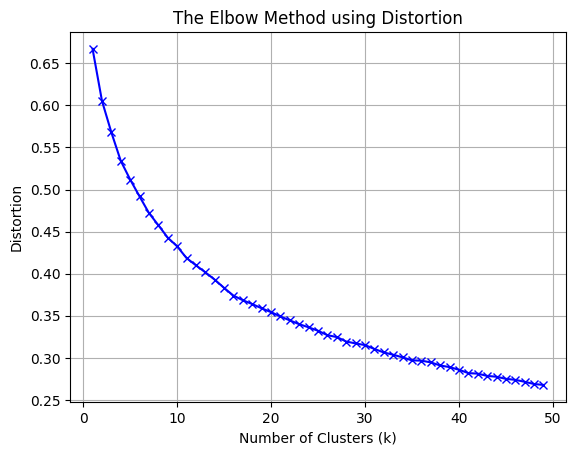

In [26]:
print("Distortion values:")
# for key, val in mapping1.items():
#     print(f'{key} : {val}')
# Plotting the graph of k versus Distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.grid()
plt.show()

Inertia values:


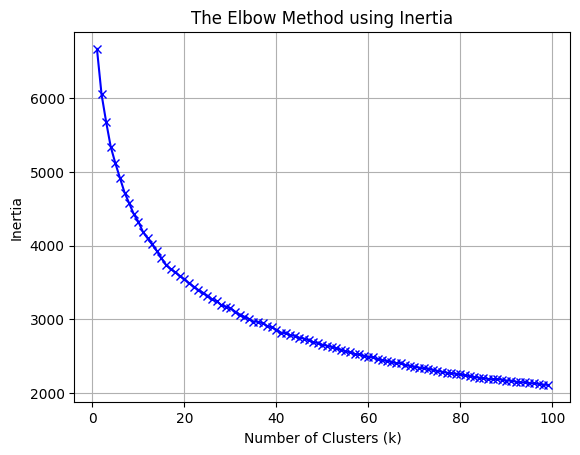

In [19]:
print("Inertia values:")
# for key, val in mapping2.items():
#     print(f'{key} : {val}')
# Plotting the graph of k versus Inertia
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid()
plt.show()


In [20]:
kmeanModel = KMeans(n_clusters=15, random_state=42).fit(normalized_df)

In [ ]:
normalized_df.iloc[0].to_numpy().reshape(1, -1)

In [ ]:
normalized_df.loc[normalized_df['Crop_Type_Corn'] == 1.0]

In [22]:
for index, row in normalized_df.loc[normalized_df['Crop_Type_Corn'] == 1.0].iterrows():
    # print(row)
    print(kmeanModel.predict(row.to_numpy().reshape(1, -1)))


KeyError: 'Crop_Type_Corn'

In [ ]:
kmeanModel.predict(normalized_df.iloc[1].to_numpy().reshape(1, -1))

In [ ]:
kmeanModel.predict(normalized_df.iloc[2].to_numpy().reshape(1, -1))

In [ ]:
kmeanModel.predict(normalized_df.iloc[3].to_numpy().reshape(1, -1))